In [8]:
import numpy as np
import pandas as pd
import uproot
import matplotlib.pyplot as plt
from hep_ml import reweight
from hep_ml.metrics_utils import ks_2samp_weighted
from sklearn.model_selection import train_test_split

In [16]:
sharedColums = ["gamma_PT","piminus_PT","piminus_IP_OWNPV","B_MINIPCHI2","B_FD_OWNPV","B_Cone3_B_ptasy","nTracks"]

columns    = {"kpi"  : sharedColums + ["Kplus_IP_OWNPV", "Kplus_PT", "Kst_892_0_PT","Kst_892_0_IP_OWNPV"],
              "pipi" : sharedColums + ["piplus_IP_OWNPV","piplus_PT","rho_770_0_PT","rho_770_0_IP_OWNPV"]}

modes      = ["kpi","kpisw", "pipi"]
histStyle  = {"bins" : 100, "density" : True, "alpha" :0.5}
colors     = {"kpi" : "#bb52de", "kpisw"  : "#d60645",  "pipi" : "#2fad66", "ratio":"#000000"}

In [10]:
dataframes  = {}
path = "/Users/finnjohnonori/Documents/GitHubRepositories/HistogramsLHCbFull/data/"

# Imports the Kpi monte carlo data - Original
with uproot.open(path + "kpiG_MC_Bd2KstGamma_HighPt_prefilter_2018_noPIDsel-magup.root") as Kpi_TChain_MC_up: # type: ignore
    Kpi_TTree_up         = Kpi_TChain_MC_up["DecayTree"]
    Kpi_up_MC_df         = Kpi_TTree_up.arrays(columns["kpi"], library="pd") # type: ignore

with uproot.open(path + "kpiG_MC_Bd2KstGamma_HighPt_prefilter_2018_noPIDsel-magdown.root") as Kpi_TChain_MC_down: # type: ignore
    Kpi_TTree_MC_down    = Kpi_TChain_MC_down["DecayTree"]
    Kpi_down_MC_df       = Kpi_TTree_MC_down.arrays(columns["kpi"], library="pd") # type: ignore

dataframes["kpi"]   = pd.concat((Kpi_up_MC_df, Kpi_down_MC_df))

#Import the pipi monte carlo data
with uproot.open(path + "pipiG_MC_Bd2RhoGamma_HighPt_prefilter_2018_noPIDsel-magup.root") as pipi_TChain_MC_up: # type: ignore
    pipi_TTree_MC_up     = pipi_TChain_MC_up["DecayTree"]
    pipi_up_MC_df        = pipi_TTree_MC_up.arrays(columns["pipi"], library="pd") # type: ignore

with uproot.open(path + "pipiG_MC_Bd2RhoGamma_HighPt_prefilter_2018_noPIDsel-magdown.root") as pipi_TChain_MC_down: # type: ignore
    pipi_TTree_MC_down   = pipi_TChain_MC_down["DecayTree"]
    pipi_down_MC_df      = pipi_TTree_MC_down.arrays(columns["pipi"], library="pd") # type: ignore

dataframes["pipi"]  = pd.concat((pipi_up_MC_df, pipi_down_MC_df))

#Imports the Sample Data - Target
with uproot.open(path + "Sample_Kpigamma_2018_selectedTree_with_sWeights_Analysis_2hg_Unbinned-Mask1.root") as Kpi_TChain_SM: # type: ignore
    Kpi_TTree_SM         = Kpi_TChain_SM["DecayTree"]

dataframes["kpisw"] = Kpi_TTree_SM.arrays(columns["kpi"] + ["NB0_Kpigamma_sw"], library="pd", cut = "(abs(B_M01-895.55)<100)") # type: ignore
dataframes["kpisw"] = dataframes["kpisw"].reset_index(drop=True)

print("Data has been loaded")

Data has been loaded


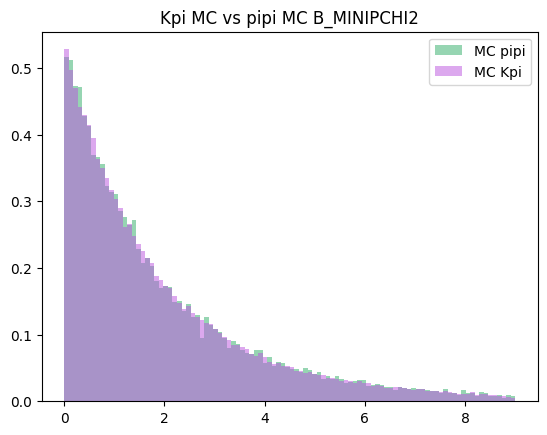

In [39]:
variableIndex = 3
variableKa = columns["kpi" ][variableIndex]
variablePi = columns["pipi"][variableIndex]


xLowerBound = min(list(dataframes["kpi"][variableKa]) + list(dataframes["pipi"][variablePi]))
xUpperBound = max(list(dataframes["kpi"][variableKa]) + list(dataframes["pipi"][variablePi]))

plt.hist(dataframes["pipi"][variablePi], range=(xLowerBound, xUpperBound), color=colors["pipi"],label="MC pipi",**histStyle)
plt.hist(dataframes["kpi"][variableKa], range=(xLowerBound, xUpperBound), color=colors["kpi"],label="MC Kpi",**histStyle)
plt.legend()
plt.title(f"Kpi MC vs pipi MC {columns['kpi'][variableIndex]}")
plt.savefig(f"{columns['kpi'][variableIndex]}_MC")

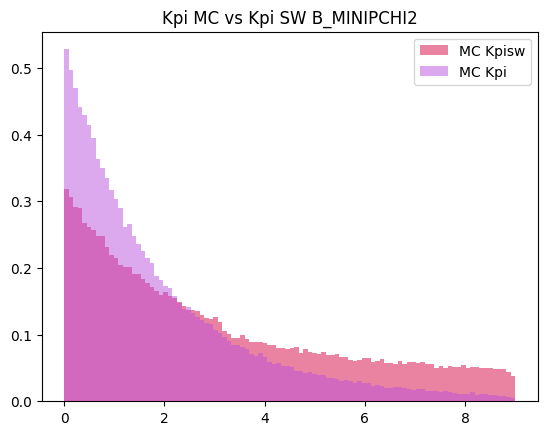

In [40]:
variableIndex = 3
variableKa = columns["kpi" ][variableIndex]


xLowerBound = min(list(dataframes["kpi"][variableKa]) )
xUpperBound = max(list(dataframes["kpi"][variableKa]) )

plt.hist(dataframes["kpisw"][variableKa], range=(xLowerBound, xUpperBound), color=colors["kpisw"],label="MC Kpisw",**histStyle)
plt.hist(dataframes["kpi"][variableKa], range=(xLowerBound, xUpperBound), color=colors["kpi"],label="MC Kpi",**histStyle)
plt.title(f"Kpi MC vs Kpi SW {columns['kpi'][variableIndex]}")
plt.legend()
plt.savefig(f"{columns['kpi'][variableIndex]}_MCSW")